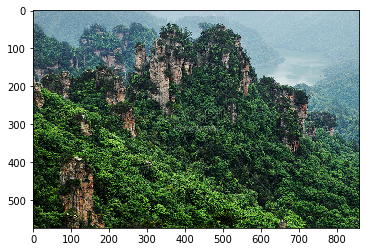

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def brightness(image, value):
    image = image + value
    image = np.clip(image,0,255)
    return image

def constrast(image, value):
    image = image*value
    image = np.clip(image,0,255)
    return image.astype(int)

def grayscale(image):
    vector = [0.3, 0.59, 0.11]
    temp = np.dot(image.astype(float), vector)
    image[::] = temp[::, ::, np.newaxis]
    return image.astype('uint8')

def flip(image, mode):
    if mode == 0: #ngang
        return image[::, ::-1]
    elif mode == 1: #doc
        return image[::-1]

def overlap(img1,img2):
    img1 = grayscale(img1)
    img2 = grayscale(img2)
    img1 = img1 + img2
    return np.clip(img1,0,255)

def blur(img, kernel): #3x3
    TL,T,TR = np.zeros(img.shape),np.zeros(img.shape),np.zeros(img.shape)
    ML,M,MR = np.zeros(img.shape),np.zeros(img.shape),np.zeros(img.shape)
    BL,B,BR = np.zeros(img.shape),np.zeros(img.shape),np.zeros(img.shape)
    
    TL[1:, 1:] = img[:img.shape[0]-1, :img.shape[1]-1]
    T[1:, :] = img[:img.shape[0]-1, :]
    TR[1:, :img.shape[1]-1] = img[:img.shape[0]-1, 1:]
    ML[:, 1:] = img[:, :img.shape[1]-1]
    M[::] = img[::]
    MR[:, :img.shape[1]-1] = img[:, 1:]
    BL[:img.shape[0]-1, 1:] = img[1:, :img.shape[1]-1]
    B[:img.shape[0]-1, :] = img[1:, :]
    BR[:img.shape[0]-1, :img.shape[1]-1] = img[1:, 1:]
    
    blur = kernel[0][0]*TL + kernel[0][1]*T + kernel[0][2]*TR
    blur+= kernel[1][0]*ML + kernel[1][1]*M + kernel[1][2]*MR 
    blur+= kernel[2][0]*BL + kernel[2][1]*B + kernel[2][2]*BR
    blur = np.clip(blur,0,255)
    return blur.astype(int)

picture=np.array(Image.open(r'D:\hinh1.jpg'), dtype=int)
plt.imshow(picture)

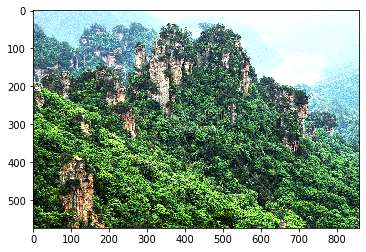

In [69]:
constrast=constrast(np.copy(picture), 1.5)
plt.imshow(constrast)

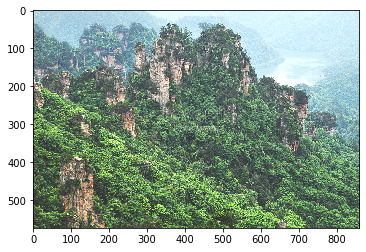

In [70]:
brightness=brightness(np.copy(picture), 50)
plt.imshow(brightness)

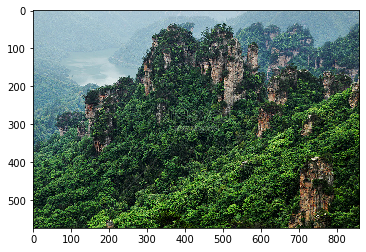

In [71]:
flip_horizental=flip(np.copy(picture), 0)
plt.imshow(flip_horizental)

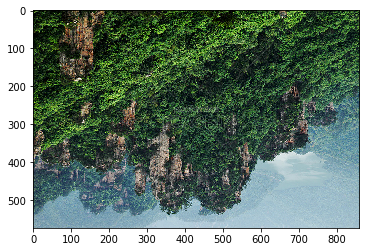

In [72]:
flip_vertical=flip(np.copy(picture), 1)
plt.imshow(flip_vertical)

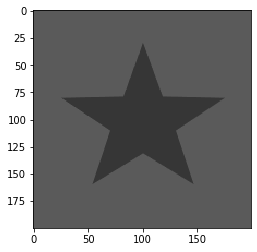

In [73]:
nendo=np.array(Image.open('nendo.png'), dtype=int)
saovang=np.array(Image.open('saovang.png'), dtype=int)
overlap = overlap(np.copy(nendo),np.copy(saovang))
plt.imshow(overlap)

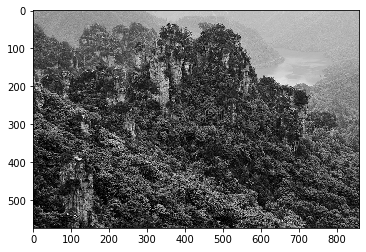

In [74]:
grayscale=grayscale(np.copy(picture))
plt.imshow(grayscale)

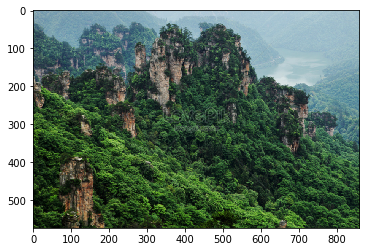

In [75]:
blur=blur(np.copy(picture), [[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]])
plt.imshow(blur)

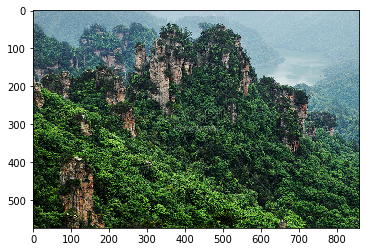

In [76]:
plt.imshow(picture)